In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, v_measure_score
import matplotlib.pyplot as plt

In [4]:
# === 1. Load and label datasets ===
df_ai = pd.read_csv('/vol/bitbucket/sg2121/fypdataset/dataset/analysis/normal_200_aigm_anal_output.csv')
df_human = pd.read_csv('/vol/bitbucket/sg2121/fypdataset/dataset/analysis/normal_460_human_anal_output.csv')

df_ai['label'] = 'AI'
df_human['label'] = 'Human'

df = pd.concat([df_ai, df_human], ignore_index=True)


In [5]:
# === 2. Encode labels for evaluation ===
label_map = {'AI': 0, 'Human': 1}
y_true = df['label'].map(label_map).values

# === 3. Select and scale features ===
features = ['spectral_centroid', 'spectral_bandwidth']  # Add more if desired
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 4. Fit Gaussian Mixture Model ===
gmm = GaussianMixture(n_components=2, random_state=42)
df['cluster'] = gmm.fit_predict(X_scaled)

In [6]:
# === 5. Evaluate clustering ===
ari = adjusted_rand_score(y_true, df['cluster'])
v_score = v_measure_score(y_true, df['cluster'])

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"V-Measure Score: {v_score:.3f}")

Adjusted Rand Index (ARI): 0.074
V-Measure Score: 0.097


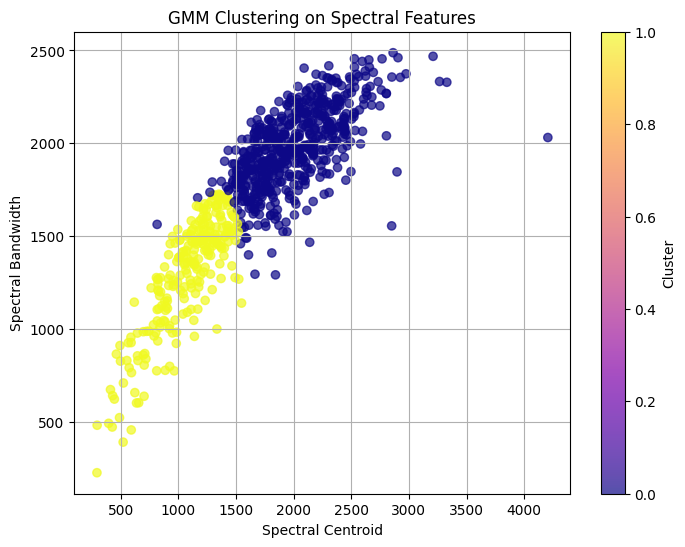

In [7]:
# === 6. Visualize ===
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['spectral_centroid'], df['spectral_bandwidth'], 
                      c=df['cluster'], cmap='plasma', alpha=0.7)
plt.xlabel('Spectral Centroid')
plt.ylabel('Spectral Bandwidth')
plt.title('GMM Clustering on Spectral Features')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()